## RamdomForest(랜덤 포레스트)

### 01 하이퍼파라미터 정의, 라이브러리

#### 01-01 라이브러리, 데이터 불러오기

In [ ]:
import numpy as np
import pandas as pd
import graphviz
import pydotplus
import matplotlib.pyplot as plt

# sklearn에서 tree, ensemble, model_selection 을 import
from sklearn import (
    tree,
    ensemble,
    model_selection,
)

# sklearn.datasets 에서 fetch_california_housing 데이터 불러오기
from sklearn.datasets import fetch_california_housing
from sklearn.metrics import (
    mean_absolute_error, # MAE
    mean_squared_error, # MSE
    accuracy_score, # 정확도(accuracy)
    precision_score, # 정밀도(precision)
    recall_score, # 재현(recall)
    f1_score, # f1_score
)



#### 01-02 colab경로설정, hyper-parameter

In [ ]:
import numpy as np
import pandas as pd
import graphviz
import pydotplus
import matplotlib.pyplot as plt
import os

# from google.colab import drive

from sklearn import (
    tree,
    ensemble,
    model_selection,
)
from sklearn.datasets import fetch_california_housing
from sklearn.metrics import (
    mean_absolute_error,
    mean_squared_error,
    accuracy_score,
    precision_score,
    recall_score,
    f1_score,
)

# drive.mount("/content/drive")
# classification_data_path = "/content/drive/MyDrive/Colab Notebooks/ml_data/diabetes.csv"

base_path = '/content/drive/MyDrive/AI_serivce_track/Week_02'

# 정확한 이름으로 다시 할당
classification_data_path = os.path.join(base_path, 'diabetes.csv')


classification_feature_names = [
    "pregnant",  # 임신 횟수
    "glucose",  # 혈당 수치
    "bp",  # 혈압
    "skin",  # 피부 두께
    "insulin",  # 인슐린
    "bmi",  # 체질량 지수
    "pedigree",  # 당뇨병 가족력
    "age",  # 나이
    "label",  # 당뇨병 여부 (0: 음성, 1: 양성)
]

regression_data_info = fetch_california_housing()
regression_feature_names = (
    regression_data_info.feature_names
)

test_data_ratio = 0.3

random_state = 0

n_estimators = 3
max_depth = 3

visualize_feature = 5

### 02 RandomForestRegressor - 회귀문제

#### 02-01 데이터 불러오는 class정의

In [ ]:

class RegressionDataLoader:
    def __init__(self, data_info, feature_names, test_data_ratio, random_state):
        self.data_info = data_info
        self.feature_names = feature_names
        self.test_data_ratio = test_data_ratio
        self.random_state = random_state

        self.data_infos = (
            self.get_data_infos()
        )
        self.data, self.label = self.get_dataset()
        self.train_data, self.train_label, self.test_data, self.test_label = (
            self.get_split_data()
        )

    def __call__(self, flag):
        if flag == "train":
            return self.train_data, self.train_label
        else:
            return self.test_data, self.test_label

    def get_data_infos(self):
        df = pd.DataFrame(self.data_info.data, columns=self.feature_names)
        df["label"] = self.data_info.target

        return df

    def get_dataset(self):
        data, label = self.data_infos.drop(columns=["label"]), self.data_infos["label"]

        return data, label

    def get_split_data(self):
        train_data, test_data, train_label, test_label = (
            model_selection.train_test_split(
                self.data,
                self.label,
                test_size=self.test_data_ratio,
                random_state=self.random_state,
            )
        )
        return train_data, train_label, test_data, test_label


regression_dataloader = RegressionDataLoader(
    regression_data_info, regression_feature_names, test_data_ratio, random_state
)
regression_train_data, regression_train_label = regression_dataloader("train")
regression_test_data, regression_test_label = regression_dataloader("test")

print(
    "regression train data: {}/regression train label: {}".format(
        regression_train_data.shape, regression_train_label.shape
    )
)
print(
    "regression test data: {}/regressiontest label: {}".format(
        regression_test_data.shape, regression_test_label.shape
    )
)

regression train data: (14448, 8)/regression train label: (14448,)
regression test data: (6192, 8)/regressiontest label: (6192,)


#### 02-02 RandomForest적용

In [ ]:
class SklearnRandomForestRegressor:
    def __init__(
        self, feature_names, n_estimators, max_depth, visualize_feature, random_state
    ):
        self.feature_names = feature_names
        self.n_estimators = n_estimators
        self.max_depth = max_depth
        self.visualize_feature = visualize_feature
        self.random_state = random_state

        self.regressor = ensemble.RandomForestRegressor(
            n_estimators=self.n_estimators,
            max_depth=self.max_depth,
            random_state=self.random_state,
        )

    def __call__(self, data):
        return self.regressor.predict(data)

    def train_model(self, train_data, train_label):
        self.regressor.fit(train_data, train_label)

    def test_model(self, test_data, test_label):
        pred = self.regressor.predict(test_data)
        mse = mean_squared_error(test_label, pred)
        mae = mean_absolute_error(test_label, pred)

        print("mse: {}/mae: {}".format(mse, mae))

    def show_trees(self):
        for index, decision_tree in enumerate(self.regressor.estimators_):
            plt.figure(figsize=(20, 10))
            tree.plot_tree(decision_tree)

    def plot_feature_importance(self):
        feature_importance = (
            self.regressor.feature_importances_
        )
        index = np.argsort(feature_importance)[::-1]
        feature_name = [
            self.feature_names[i] for i in index[: self.visualize_feature]
        ]

        most_important_feature = feature_importance[
            index[: self.visualize_feature]
        ]

        plt.title("Most Important {} Features".format(self.visualize_feature))
        plt.bar(range(self.visualize_feature), most_important_feature, align="center")
        plt.xticks(range(self.visualize_feature), feature_name, rotation=90)
        plt.xlabel("Feature")
        plt.ylabel("Importance")
        plt.show()


sklearn_rf_regressor = SklearnRandomForestRegressor(
    regression_feature_names, n_estimators, max_depth, visualize_feature, random_state
)
sklearn_rf_regressor.train_model(regression_train_data, regression_train_label)
sklearn_rf_regressor.test_model(regression_test_data, regression_test_label)


mse: 0.613446374491919/mae: 0.5840954701580117


#### 02-03 시각화 및 feature 해석

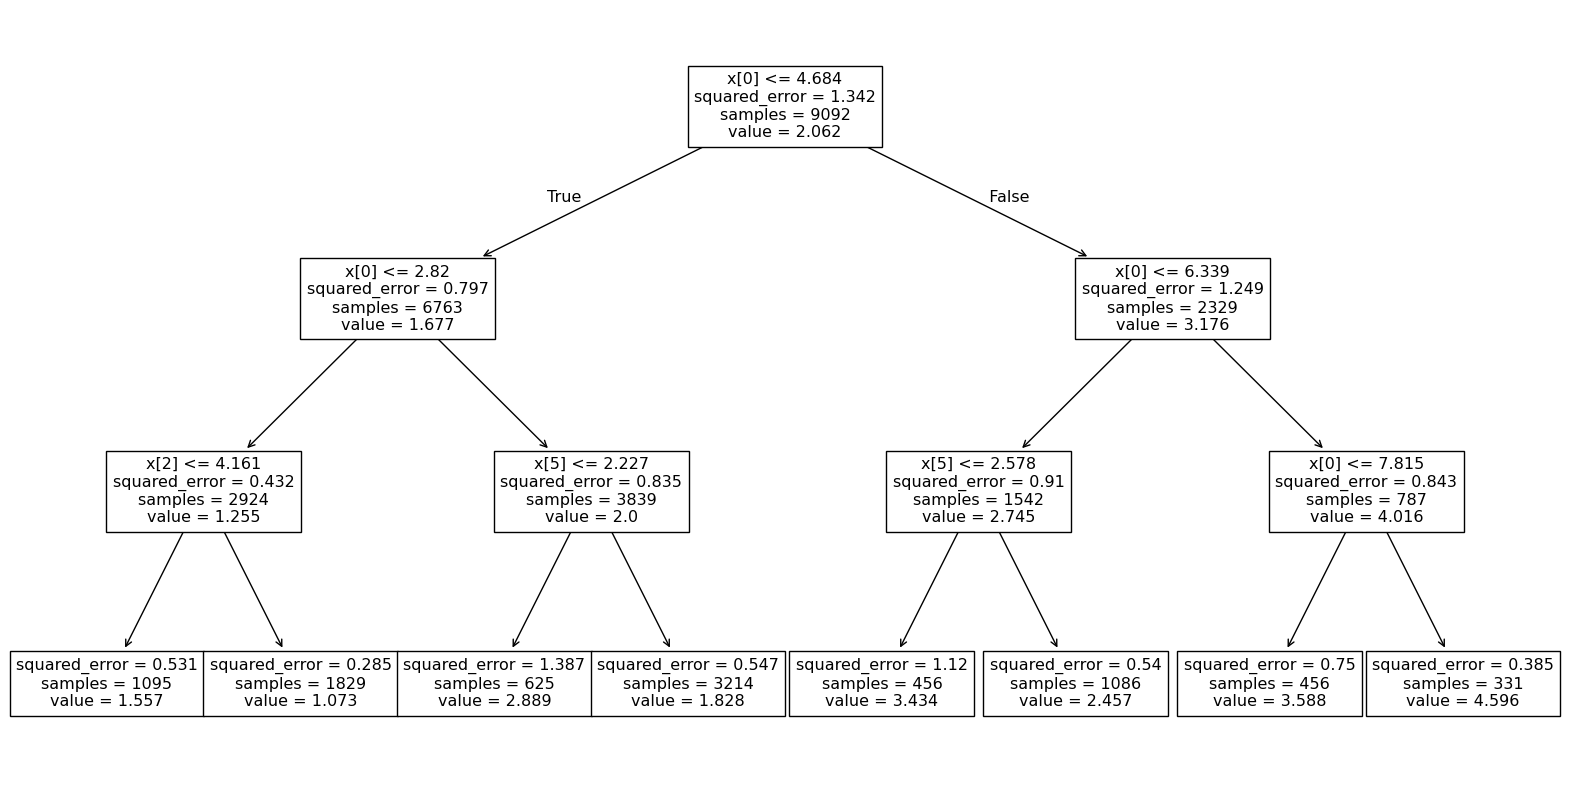

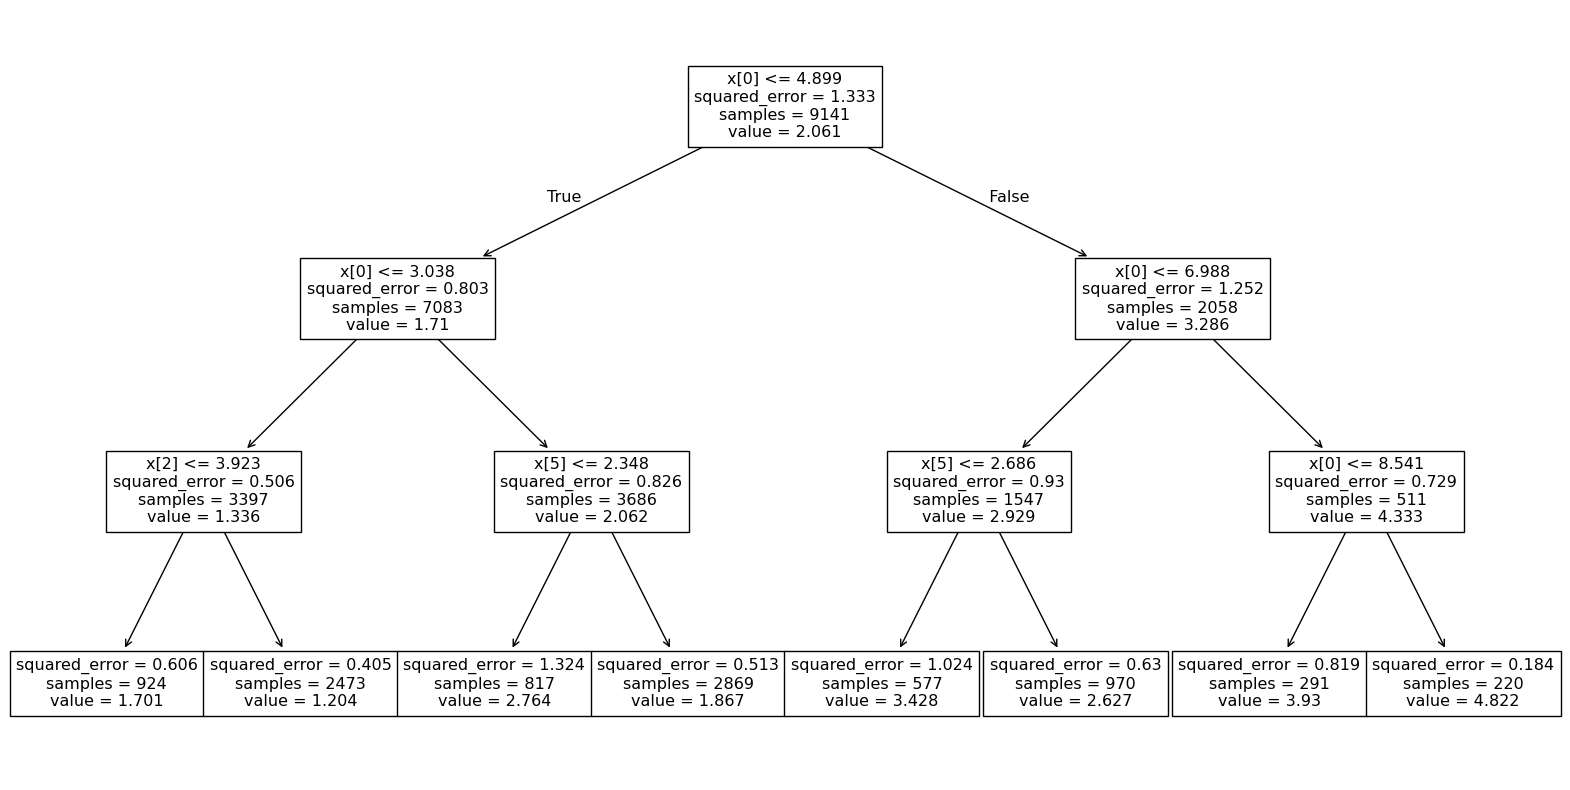

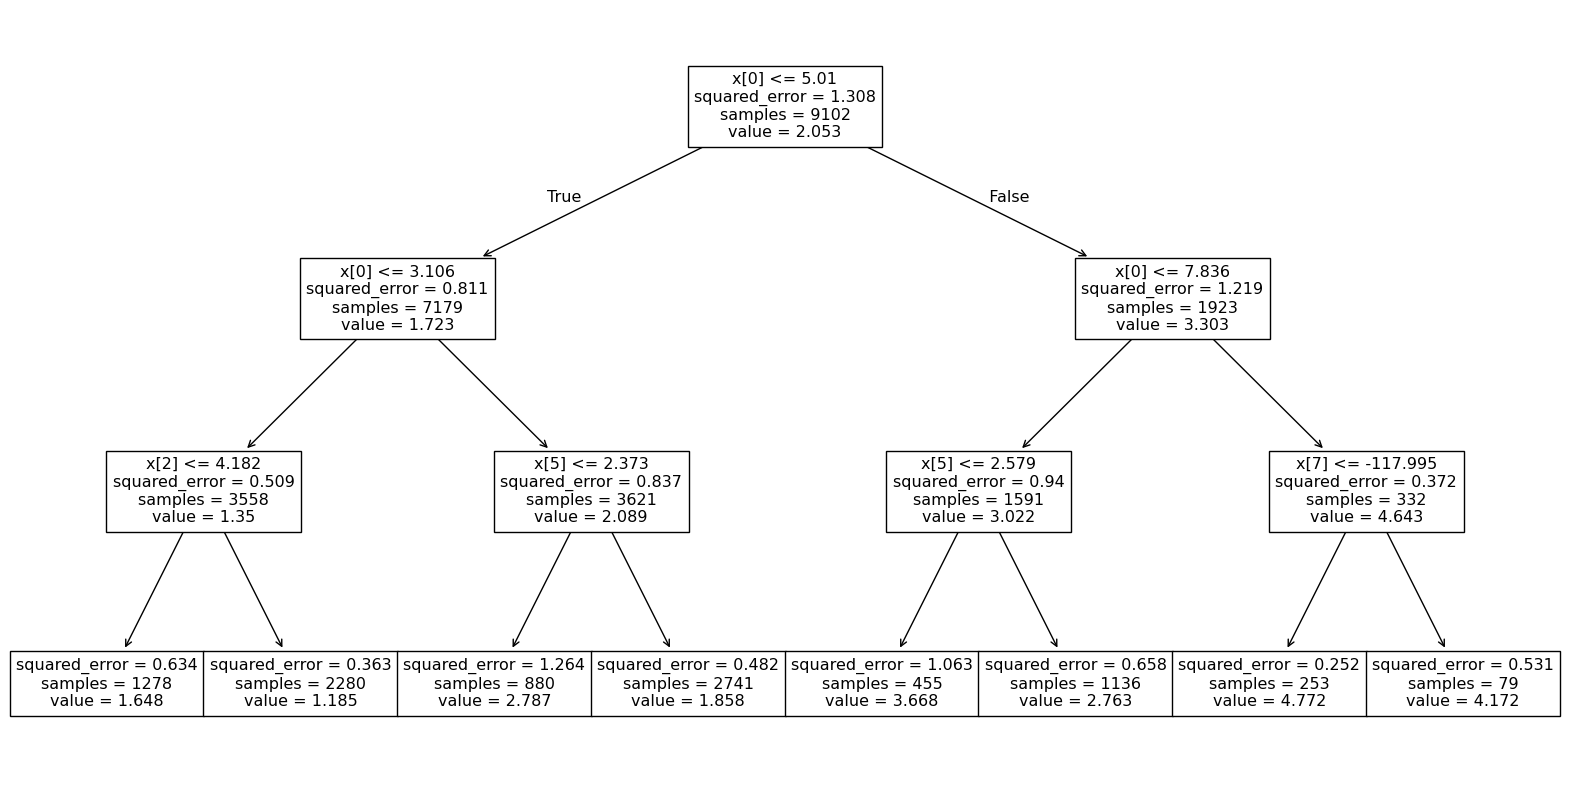

In [ ]:
sklearn_rf_regressor.show_trees()

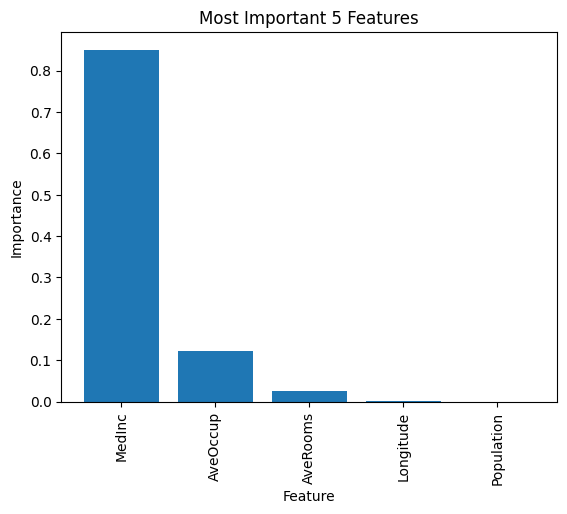

In [ ]:
sklearn_rf_regressor.plot_feature_importance()

### 03 RamdomForest-classifier

#### 03-01 데이터 불러오는 class

In [ ]:

class BinomialClassificationDataLoader:
    def __init__(
        self, path, feature_names, test_data_ratio, visualize_feature, random_state
    ):
        self.data_path = path
        self.feature_names = feature_names
        self.test_data_ratio = test_data_ratio
        self.visualize_feature = visualize_feature
        self.random_state = random_state

        self.csv_infos = (
            self.get_csv_infos()
        )
        self.csv_data, self.csv_label = (
            self.get_csv_dataset()
        )
        self.train_data, self.train_label, self.test_data, self.test_label = (
            self.get_split_data()
        )

    def __call__(self, flag):
        if flag == "train":
            return self.train_data, self.train_label
        elif flag == "test":
            return self.test_data, self.test_label

    def get_csv_infos(self):
        df = pd.read_csv(self.data_path, header=None).drop([0], axis=0)
        df.columns = self.feature_names

        return df

    def get_csv_dataset(self):
        data, label = self.csv_infos[self.feature_names[:-1]], self.csv_infos[
            self.feature_names[-1]
        ].astype(int)

        return data, label

    def get_split_data(self):
        train_data, test_data, train_label, test_label = (
            model_selection.train_test_split(
                self.csv_data,
                self.csv_label,
                test_size=self.test_data_ratio,
                random_state=self.random_state,
            )
        )
        return train_data, train_label, test_data, test_label


classification_dataloader = BinomialClassificationDataLoader(
    classification_data_path,
    classification_feature_names,
    test_data_ratio,
    visualize_feature,
    random_state,
)
classification_train_data, classification_train_label = classification_dataloader(
    "train"
)
classification_test_data, classification_test_label = classification_dataloader("test")

print(
    "classification train data: {}/classification train label: {}".format(
        classification_train_data.shape, classification_train_label.shape
    )
)
print(
    "classification test data: {}/classification test label: {}".format(
        classification_test_data.shape, classification_test_label.shape
    )
)

classification train data: (537, 8)/classification train label: (537,)
classification test data: (231, 8)/classification test label: (231,)


#### 03-02 RamdomForestClassifier class 정의

In [ ]:

class SklearnRandomForestClassifier:
    def __init__(
        self, feature_names, n_estimators, max_depth, visualize_feature, random_state
    ):
        self.feature_names = feature_names
        self.n_estimators = 1
        self.max_depth = 1
        self.visualize_feature = visualize_feature
        self.random_state = random_state

        self.classifier = ensemble.RandomForestClassifier(
            n_estimators=self.n_estimators,
            max_depth=self.max_depth,
            max_samples=None,
            bootstrap=False,
            max_features=None,
            random_state=self.random_state,
        )

    def __call__(self, data):
        return self.classifier.predict(data)

    def train_model(self, train_data, train_label):
        self.classifier.fit(train_data, train_label)

    def test_model(self, test_data, test_label):
        pred = self.classifier.predict(test_data)
        accuracy = accuracy_score(test_label, pred)
        precision = precision_score(test_label, pred)
        recall = recall_score(test_label, pred)
        f1_measure = f1_score(test_label, pred)

        print(
            "acc: {}/precision: {}/recall: {}/f1-measure: {}".format(
                accuracy, precision, recall, f1_measure
            )
        )

    def show_trees(self):
        for index, decision_tree in enumerate(self.classifier.estimators_):
            tree.plot_tree(decision_tree)

    def plot_feature_importance(self):
        feature_importance = (
            self.classifier.feature_importances_
        )
        index = np.argsort(feature_importance)[::-1]
        feature_name = [
            self.feature_names[i] for i in index[: self.visualize_feature]
        ]

        most_important_feature = feature_importance[
            index[: self.visualize_feature]
        ]

        plt.title("Most Important {} Features".format(self.visualize_feature))
        plt.bar(range(self.visualize_feature), most_important_feature, align="center")
        plt.xticks(range(self.visualize_feature), feature_name, rotation=90)
        plt.xlabel("Feature")
        plt.ylabel("Importance")
        plt.show()


sklearn_rf_classifier = SklearnRandomForestClassifier(
    classification_feature_names,
    n_estimators,
    max_depth,
    visualize_feature,
    random_state,
)
sklearn_rf_classifier.train_model(classification_train_data, classification_train_label)
sklearn_rf_classifier.test_model(classification_test_data, classification_test_label)


acc: 0.7316017316017316/precision: 0.6363636363636364/recall: 0.3783783783783784/f1-measure: 0.4745762711864407


#### 03-03 RamdomForestClassifier 시각화

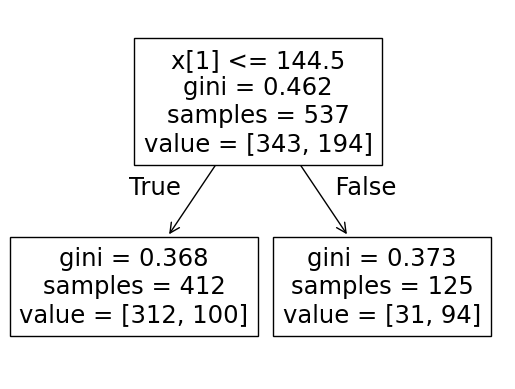

In [ ]:
sklearn_rf_classifier.show_trees()

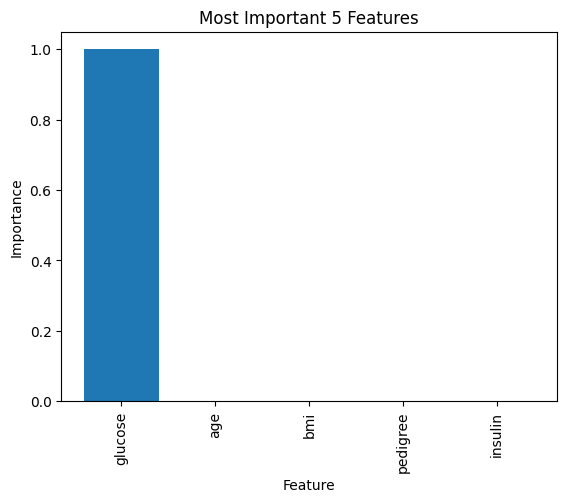

In [ ]:
sklearn_rf_classifier.plot_feature_importance()